# Cluster Analysis

## K-Means Clustering 

<p>
    The K means clustering algorithm is a simple unsupervised algorithm that is used for 
    quickly predicting groupings from within an unlabeled dataset
</p>

<p>
    Predictions are based on: 
    <ul>
        <li>The number of cluster centers that are present (k)</li>
        <li>Nearest mean values between observations (measured in 
            Euclidian distance between observations)</li>
    </ul>
</p>

### Popular Use Cases

<ul>
        <li>Market Price and cost modeling </li>
        <li>Customer Segmentation </li>
        <li>Insurance Claim fraud detection</li>
        <li>Hedge Fund Classification </li>
</ul>


### Things to keep in mind

<p>
    <ul>
        <li>Scale your variables</li>
        <li>Look at a scatter plot or the data table to estimate the number of centroids , or 
        cluster centers, to set for the k paramter in the model</li>
    </ul>
</p>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report 

In [9]:
%matplotlib inline
plt.figure(figsize=(7,4))

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

In [12]:
iris = datasets.load_iris()
x = scale(iris.data)
y = pd.DataFrame(iris.target)
variable_name = iris.feature_names

x[:10,]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

In [39]:
#instaniate model 
clustering_model = KMeans(n_clusters=3, random_state=5)
clustering_model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

In [40]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', "Petal_Width"]
y.columns = ['Targets']

Text(0.5, 1.0, 'K Means Classification')

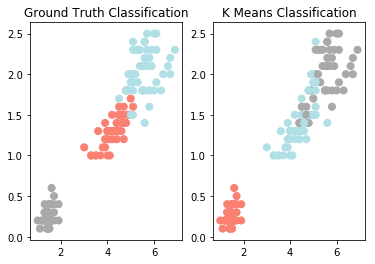

In [46]:
color_theme = np.array(['darkgray','salmon','powderblue'])
plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title("Ground Truth Classification")

color_theme = np.array(['darkgray','salmon','powderblue'])
plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width, 
            c=color_theme[clustering_model.labels_], s=50)
plt.title("K Means Classification")

In [47]:
relabel = np.choose(clustering_model.labels_, [2,0,1]).astype(np.int64)

Text(0.5, 1.0, 'K Means Classification')

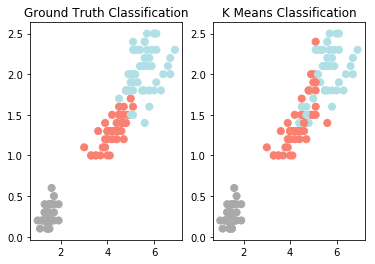

In [48]:
plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title("Ground Truth Classification")

color_theme = np.array(['darkgray','salmon','powderblue'])
plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width, c=color_theme[relabel], s=50)
plt.title("K Means Classification")

### Evaluating Clustering Results

In [49]:
# here we are looking for high precision and high recall (relevancy and completeness) which
# equals high accurarcy model results
print(classification_report(y,relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



## Hierarchial Clustering

Predicts subgroups within data by 
finding the ditance between each data point and 
its nearest neghbor
linking the most near by neaighbors

You are able to find the number of subgroups by observing a dendrogram

### Use Cases:
<ul>
    <li>Hospistal Resource Managment</li>
    <li>Business Process Management </li>
    <li>Customer Segmentaiton</li>
    <li>Social Network Analysis</li>
</ul>

<p>
    <i>Parameter Selection is done mainly by trial and error and finding the combnation that returns the most accurate results.</i>

Ditance metrics include: 
<ul>
    <li>Euclidan</li>
    <li>Manhattan</li>
    <li>Cosine</li>
</ul>

Linkage Paramters:
<ul>
    <li>Ward</li>
    <li>Complete</li>
    <li>Average</li>
</ul>
</p>

In [26]:
file = "mtcars.csv"
cars_data = pd.read_csv(file)
cars_data.columns = ["car_name", "mpg", "cyl", "disp", "hp", "drat", "wt", "qsec", "vs", "am", "gear", "carb"]
X = cars_data.iloc[:,[1,3,4,6]].values
y = cars_data.iloc[:,(9)].values

In [16]:
#generate a dendrogram 
# Z = linkage(X, 'ward')
# dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation = 45, show_contracted=True)

## K Nearest Neighbor Classification

<p>
    K-NN is a supervised classifier that memorizes observations from within a labled test 
set to predict classification labels for new unlabled, observarions
    
   Makes predictions based on how similar training observations are to the new incoming observations. 
    
   The more similar the observation's value, the more likely they will be classified with the same label.
</p>

### Use Cases:
<p>
    <ul>
        <li>stock price prediction, </li>
        <li>recommendation systems, </li>
        <li>predictive trip planning, and </li>
        <li>credit risk analysis.</li> 
    </ul>
</p>

<p>
   KNN makes a few assusmptions: 
    <ul>
        <li>Dataset has little noise</li>
        <li>Dataset is labeled</li>
        <li>Only contains releveant features</li>
        <li>Has distinguishable subgroups</li>    
    </ul>
    
Try to avoid using with large datasets. Might take too long to process
<p>

In [18]:
import urllib

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import preprocessing
#from sklearn.cross_validation import train_test_split

<p>Split data into training and test data</p>
<p>
    Still using cars csv
</p>

In [30]:
# scaling our variables 
X_prime = cars_data.iloc[:,[1,3,4,6]].values
X = preprocessing.scale(X_prime)